In [36]:
# Part 1

import networkx as nx

n = 1000
repeat = 10
p = 0.0034 

s = 0

for i in range(repeat):
    G = nx.fast_gnp_random_graph(n,p)
    s += G.number_of_edges()
    
print(s/repeat)



1701.6


144.5


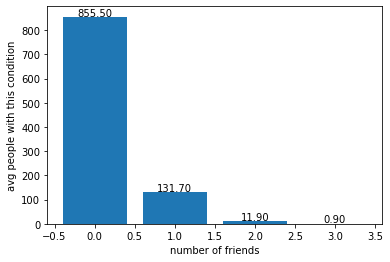

In [42]:
# Part 2

import networkx as nx
import matplotlib.pyplot as plt

n = 1000
p = 0.00016
repeat = 10

Glist = []
sprime = 0


for j in range(repeat):
    G = nx.fast_gnp_random_graph(n,p)
    Glist.append(G)
    
    s = 0

    for i in range(n):
        s = s + G.degree[i]
    L = s/n

    for i in range(n):
        if  G.degree[i] >= L :
            sprime = sprime + 1
print(sprime/repeat)

flist = []
xlist = []
s = 0

for i in range(n):
    for G in Glist:
        for j in range(n):
            if G.degree[j] == i:
                s = s + 1
    if s != 0 :
        flist.append(s/repeat)
        xlist.append(i)
    s = 0

plt.bar(xlist,flist)

for x,y in zip(xlist,flist):

    label = "{:.2f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,1), 
                 ha='center')

plt.xlabel('number of friends')

plt.ylabel('avg people with this condition')

plt.title('')

plt.show()

In [52]:
# Part 3

import networkx as nx

n = 3000
p = 0.01
repeat = 5

number_of_triangles = 0
number_of_contests = 0

for m in range(repeat):
    
    G = nx.fast_gnp_random_graph(n,p)
    
    H = G.to_directed()
    T = nx.triadic_census(H)

    if '300' in T.keys():
        number_of_triangles = number_of_triangles + T.get('300')
    if '201' in T.keys():
        number_of_contests = number_of_contests + T.get('201')

print(number_of_triangles/repeat)
print(number_of_contests/repeat)



4492.0
1329365.8


In [5]:
# Part 4 

import networkx as nx

n = 2000
p = 0.2
repeat = 3

number_of_triangles = 0
number_of_contests = 0

for m in range(repeat):
    
    G = nx.fast_gnp_random_graph(n,p)
    
    H = G.to_directed()
    
    print("round "+str(m+1)+" started!")
    
    T = nx.triadic_census(H)

    if '300' in T.keys():
        number_of_triangles = number_of_triangles + T.get('300')
    if '201' in T.keys():
        number_of_contests = number_of_contests + T.get('201')
    
    print("round "+str(m+1)+" completed!")

print(number_of_triangles/repeat)
print(number_of_contests/repeat)

round 1 started!
round 1 completed!
round 2 started!
round 2 completed!
round 3 started!
round 3 completed!
10666854.666666666
127907403.33333333


In [79]:
# Part 5

import random 
import networkx as nx

n = 1000
p = 0.003

G = nx.fast_gnp_random_graph(n,p)

s = 0

for i in range(n):
    s += len(list(G.subgraph(G.neighbors(i)).edges))
    
print(s/n)
    


0.012


In [24]:
# Part 6

import networkx as nx

n = 1000
p = 0.0033

G = nx.fast_gnp_random_graph(n,p)
s = 0

for i in range(n):
    for j in range(1,n):
        if nx.has_path(G, i, j):
            s = s + nx.shortest_path_length(G,i,j)
        
print(s/(n*(n-1)/2))

10.481387387387388


In [70]:
# Part 7

import networkx as nx

n = 50
p = 0.34
repeat = 100

s = 0

for i in range(repeat):
    G = nx.fast_gnp_random_graph(n,p)

    s += nx.diameter(G)
    
print(s/repeat)

2.77


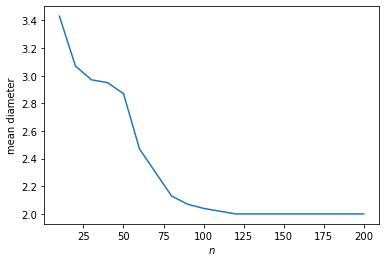

In [100]:
# Part 8

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

a = 10
b = 200
step = 10
n = np.arange(a, b + step, step).tolist()
p = 0.34
repeat = 100

s = 0
diaList = []

for nprime in  n:

    for j in range(repeat):
        G = nx.fast_gnp_random_graph(nprime,p)
        
        if not nx.is_connected(G):
            maxL = 0
            for Gprime in nx.connected_components(G):
                diag = nx.diameter(G.subgraph(Gprime))
                if diag > maxL:
                    maxL = diag
            s+=maxL
        else :
            s += nx.diameter(G)

    diaList.append(s/repeat)
    s = 0 

plt.plot(n,diaList)
plt.ylabel('mean diameter')
plt.xlabel('$n$')
plt.show()
